In [ ]:
#link KAGGLE - https://www.kaggle.com/rikdifos/credit-card-approval-prediction?select=credit_record.csv

**PROYECTO FINAL CURSO DATA SCIENCE CODERHOUSE 2022**

Trabajaremos sobre un dataset de TARJETAS DE CRÉDITO con el objetivo de definir clusters de clientes centrándonos en la posibilidad de cobro ante los mismos. Entonces, de esta forma, tendremos una cluesterización de clientes que permita a la empresa verificar si éste sera un cliente QUE PAGUE O NO (??)

In [ ]:
#Importamos librerías
import pandas as pd
import numpy as np
import seaborn as sns
from seaborn import distplot
import matplotlib.pyplot as plt

In [ ]:
#Leemos los dataset
aplication = pd.read_csv("/content/application.csv")
aplication

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438552,6840104,M,N,Y,0,135000.0,Pensioner,Secondary / secondary special,Separated,House / apartment,-22717,365243,1,0,0,0,NaN,1.0
438553,6840222,F,N,N,0,103500.0,Working,Secondary / secondary special,Single / not married,House / apartment,-15939,-3007,1,0,0,0,Laborers,1.0
438554,6841878,F,N,N,0,54000.0,Commercial associate,Higher education,Single / not married,With parents,-8169,-372,1,1,0,0,Sales staff,1.0
438555,6842765,F,N,Y,0,72000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-21673,365243,1,0,0,0,NaN,2.0


In [ ]:
#Leemos los dataset
credit = pd.read_csv("/content/credit.csv")
credit

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C
...,...,...,...
1048570,5150487,-25,C
1048571,5150487,-26,C
1048572,5150487,-27,C
1048573,5150487,-28,C


In [ ]:
#Unimos los dataset
df = pd.merge(aplication,credit,on="ID")
df

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,0,C
1,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-1,C
2,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-2,C
3,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-3,C
4,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-4,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
777710,5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,-9188,-1193,1,0,0,0,Laborers,1.0,-9,0
777711,5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,-9188,-1193,1,0,0,0,Laborers,1.0,-10,2
777712,5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,-9188,-1193,1,0,0,0,Laborers,1.0,-11,1
777713,5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,-9188,-1193,1,0,0,0,Laborers,1.0,-12,0


En los siguientes pasos se realizará un análisis EDA para identificar variables y su comportamiento

In [ ]:
#Vemos resumen del dataset
df.describe().round().T

,count,mean,std,min,25%,50%,75%,max
ID,777715.0,5078743.0,41804.0,5008804.0,5044568.0,5069530.0,5115551.0,5150487.0
CNT_CHILDREN,777715.0,0.0,1.0,0.0,0.0,0.0,1.0,19.0
AMT_INCOME_TOTAL,777715.0,188535.0,101622.0,27000.0,121500.0,162000.0,225000.0,1575000.0
DAYS_BIRTH,777715.0,-16125.0,4104.0,-25152.0,-19453.0,-15760.0,-12716.0,-7489.0
DAYS_EMPLOYED,777715.0,57776.0,136472.0,-15713.0,-3292.0,-1682.0,-431.0,365243.0
FLAG_MOBIL,777715.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
FLAG_WORK_PHONE,777715.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
FLAG_PHONE,777715.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
FLAG_EMAIL,777715.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
CNT_FAM_MEMBERS,777715.0,2.0,1.0,1.0,2.0,2.0,3.0,20.0


In [ ]:
#Reemplazo los valores str por int en "ACCOUNT STATUS"
df= df.replace({"C":"6","X":"7"})
df

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,0,6
1,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-1,6
2,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-2,6
3,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-3,6
4,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-4,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
777710,5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,-9188,-1193,1,0,0,0,Laborers,1.0,-9,0
777711,5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,-9188,-1193,1,0,0,0,Laborers,1.0,-10,2
777712,5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,-9188,-1193,1,0,0,0,Laborers,1.0,-11,1
777713,5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,-9188,-1193,1,0,0,0,Laborers,1.0,-12,0


In [ ]:
#Vemos el tamaño
df.shape

(777715, 20)

In [ ]:
#Vemos nombre de columnas
df.columns

Index(['ID', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'FLAG_MOBIL', 'FLAG_WORK_PHONE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'MONTHS_BALANCE',
       'STATUS'],
      dtype='object')

In [ ]:
#Cambiamos nombres de columnas
df = df.rename(columns={"CODE_GENDER":"GENDER", "FLAG_OWN_CAR":"CAR","FLAG_OWN_REALTY":"PROPERTIES","CNT_CHILDREN":"CHILDREN", "AMT_INCOME_TOTAL":"ANNUAL INCOME", "NAME_INCOME_TYPE":"INCOME CATEGORY", "NAME_EDUCATION_TYPE":"EDUCATION LEVEL", "NAME_FAMILY_STATUS":"MARITAL STATUS", "NAME_HOUSING_TYPE":"WAY OF LIVING", "DAYS_BIRTH":"BIRTHDAY", "DAYS_EMPLOYED":"START DAY", "FLAG_MOBIL":"MOBILE PHONE", "FLAG_WORK_PHONE":"WORK PHONE", "FLAG_PHONE": "PHONE", "FLAG_EMAIL": "EMAIL", "OCCUPATION_TYPE":"OCCUPATION", "CNT_FAM_MEMBERS":"FAMILY SIZE", "MONTHS_BALANCE":"MONTHS OF BALANCE", "STATUS":"ACCOUNT STATUS"})
df

,ID,GENDER,CAR,PROPERTIES,CHILDREN,ANNUAL INCOME,INCOME CATEGORY,EDUCATION LEVEL,MARITAL STATUS,WAY OF LIVING,BIRTHDAY,START DAY,MOBILE PHONE,WORK PHONE,PHONE,EMAIL,OCCUPATION,FAMILY SIZE,MONTHS OF BALANCE,ACCOUNT STATUS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,0,6
1,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-1,6
2,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-2,6
3,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-3,6
4,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-4,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
777710,5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,-9188,-1193,1,0,0,0,Laborers,1.0,-9,0
777711,5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,-9188,-1193,1,0,0,0,Laborers,1.0,-10,2
777712,5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,-9188,-1193,1,0,0,0,Laborers,1.0,-11,1
777713,5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,-9188,-1193,1,0,0,0,Laborers,1.0,-12,0


Se cambió el nombre de las columnas para una mayor identificación de las variables. 
A continuación, se hará una breve descripción de ellas:

**ID:** Numero de cliente

**GENDER:**	Género del cliente.

**CAR**	posee o no auto

**PROPERTIES**	posee propiedades

**CHILDREN**	Numero de niños	

**ANNUAL INCOME** Ingresos anuales

**INCOME CATEGORY**	Categoría de ingresos	

**EDUCATION TYPE** Nivel de Educación	

**MARITAL STATUS**	Estado civil	

**WAY OF LIVING**	Modo de vivir	

**BIRTHDAY**	Cumpleaños - Cuenta hacia atrás desde el día actual (0), -1 significa ayer,etc.

**START DAY**	Fecha de inicio del empleo	Contar hacia atrás desde el día actual (0). Si es positivo, significa la persona actualmente desempleada.

**MOBILE PHONE** Posee telefono movil

**WORK PHON**E	Posee teléfono de trabajo

**PHONE**	Posee teléfono

**E-MAIL** hay un correo electronico	

**OCCUPATION**	Ocupación	

**FAMILY SIZE**	Tamaño de la familia	

**MONTHS OF BALANCE**	El mes de los datos extraídos es el punto de partida, al revés, 0 es el mes actual, -1 es el mes anterior, etc.

**ACCOUNT STATUS**
0: 1-29 días de atraso 
1: 30-59 días de atraso 
2: 60-89 días de atraso 
3: 90-119 días de atraso 
4: 120-149 días de atraso 
5: Deudas atrasadas o incobrables, canceladas por más de 150 días 
C: pagado ese mes 
X: No hay préstamo para el mes

In [ ]:
df.value_counts("ACCOUNT STATUS")

ACCOUNT STATUS
6    329536
0    290654
7    145950
1      8747
5      1527
2       801
3       286
4       214
dtype: int64

In [ ]:
#Vemos tipos de datos de cada columna
df.dtypes

ID                     int64
GENDER                object
CAR                   object
PROPERTIES            object
CHILDREN               int64
ANNUAL INCOME        float64
INCOME CATEGORY       object
EDUCATION LEVEL       object
MARITAL STATUS        object
WAY OF LIVING         object
BIRTHDAY               int64
START DAY              int64
MOBILE PHONE           int64
WORK PHONE             int64
PHONE                  int64
EMAIL                  int64
OCCUPATION            object
FAMILY SIZE          float64
MONTHS OF BALANCE      int64
ACCOUNT STATUS        object
dtype: object

In [ ]:
#Vemos info sobre null
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 777715 entries, 0 to 777714
Data columns (total 20 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   ID                 777715 non-null  int64  
 1   GENDER             777715 non-null  object 
 2   CAR                777715 non-null  object 
 3   PROPERTIES         777715 non-null  object 
 4   CHILDREN           777715 non-null  int64  
 5   ANNUAL INCOME      777715 non-null  float64
 6   INCOME CATEGORY    777715 non-null  object 
 7   EDUCATION LEVEL    777715 non-null  object 
 8   MARITAL STATUS     777715 non-null  object 
 9   WAY OF LIVING      777715 non-null  object 
 10  BIRTHDAY           777715 non-null  int64  
 11  START DAY          777715 non-null  int64  
 12  MOBILE PHONE       777715 non-null  int64  
 13  WORK PHONE         777715 non-null  int64  
 14  PHONE              777715 non-null  int64  
 15  EMAIL              777715 non-null  int64  
 16  OC

In [ ]:
#Eliminamos NaN
df.isnull().sum()

ID                        0
GENDER                    0
CAR                       0
PROPERTIES                0
CHILDREN                  0
ANNUAL INCOME             0
INCOME CATEGORY           0
EDUCATION LEVEL           0
MARITAL STATUS            0
WAY OF LIVING             0
BIRTHDAY                  0
START DAY                 0
MOBILE PHONE              0
WORK PHONE                0
PHONE                     0
EMAIL                     0
OCCUPATION           240048
FAMILY SIZE               0
MONTHS OF BALANCE         0
ACCOUNT STATUS            0
dtype: int64

In [ ]:
df_limpio = df.dropna()
df_limpio

,ID,GENDER,CAR,PROPERTIES,CHILDREN,ANNUAL INCOME,INCOME CATEGORY,EDUCATION LEVEL,MARITAL STATUS,WAY OF LIVING,BIRTHDAY,START DAY,MOBILE PHONE,WORK PHONE,PHONE,EMAIL,OCCUPATION,FAMILY SIZE,MONTHS OF BALANCE,ACCOUNT STATUS
31,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0,0,6
32,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0,-1,6
33,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0,-2,6
34,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0,-3,6
35,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0,-4,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
777710,5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,-9188,-1193,1,0,0,0,Laborers,1.0,-9,0
777711,5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,-9188,-1193,1,0,0,0,Laborers,1.0,-10,2
777712,5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,-9188,-1193,1,0,0,0,Laborers,1.0,-11,1
777713,5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,-9188,-1193,1,0,0,0,Laborers,1.0,-12,0


In [ ]:
#Vemos cual es la ocupación mas popular
df_limpio.value_counts("OCCUPATION")

OCCUPATION
Laborers                 131572
Core staff                77112
Sales staff               70362
Managers                  67738
Drivers                   47678
High skill tech staff     31768
Accountants               27223
Medicine staff            26691
Cooking staff             13416
Security staff            12400
Cleaning staff            11399
Private service staff      6714
Low-skill Laborers         3623
Secretaries                3149
Waiters/barmen staff       2557
HR staff                   1686
IT staff                   1319
Realty agents              1260
dtype: int64

In [ ]:
#Vemos cual es la forma de vida mas popular
df_limpio.value_counts("WAY OF LIVING")

WAY OF LIVING
House / apartment      474177
With parents            29351
Municipal apartment     18023
Rented apartment         8561
Office apartment         4159
Co-op apartment          3396
dtype: int64

In [ ]:
#Vemos cual es el nivel de educación mas popular
df_limpio.value_counts("EDUCATION LEVEL")

EDUCATION LEVEL
Secondary / secondary special    358317
Higher education                 153770
Incomplete higher                 20590
Lower secondary                    4556
Academic degree                     434
dtype: int64

In [ ]:
#Vemos cual es la categoria de ingresos mas popular
df_limpio.value_counts("INCOME CATEGORY")

INCOME CATEGORY
Working                 332868
Commercial associate    151412
State servant            52733
Pensioner                  332
Student                    322
dtype: int64

In [ ]:
df_limpio.value_counts("ANNUAL INCOME").sort_index()

ANNUAL INCOME
27000.0       78
31500.0      138
32400.0       32
36000.0      144
36900.0       11
            ... 
945000.0      48
990000.0      26
1125000.0     83
1350000.0    102
1575000.0    150
Length: 195, dtype: int64

In [ ]:
#Creamos rangos de ANNUAL INCOME para que sea mas sencillo el análisis

#REFERENCIAS: 1(entre $0 y $100.000), 2(entre $100K y $200K), 3(entre $200K y $300K), 4(entre$300K y $400K), 5(entre $400K y $500K), 6(entre $500K y $600K), 7(entre $600K y $700K), 8(entre $700K y $800K)
#9(entre $800K y $900K), 10(entre $900K y $1M), 11(entre 1M y 1.5M), 12(entre 1.5M y 2M)
conditions = [
    (df_limpio["ANNUAL INCOME"]> 0) & (df_limpio["ANNUAL INCOME"]<= 100000),
    (df_limpio["ANNUAL INCOME"]> 100000) & (df_limpio["ANNUAL INCOME"]<= 200000),
    (df_limpio["ANNUAL INCOME"]> 200000) & (df_limpio["ANNUAL INCOME"]<= 300000),
    (df_limpio["ANNUAL INCOME"]> 300000) & (df_limpio["ANNUAL INCOME"]<= 400000),
    (df_limpio["ANNUAL INCOME"]> 400000) & (df_limpio["ANNUAL INCOME"]<= 500000),
    (df_limpio["ANNUAL INCOME"]> 500000) & (df_limpio["ANNUAL INCOME"]<= 600000),
    (df_limpio["ANNUAL INCOME"]> 600000) & (df_limpio["ANNUAL INCOME"]<= 700000), 
    (df_limpio["ANNUAL INCOME"]> 700000) & (df_limpio["ANNUAL INCOME"]<= 800000),
    (df_limpio["ANNUAL INCOME"]> 800000) & (df_limpio["ANNUAL INCOME"]<= 900000),
    (df_limpio["ANNUAL INCOME"]> 900000) & (df_limpio["ANNUAL INCOME"]<= 1000000),
    (df_limpio["ANNUAL INCOME"]> 1000000) & (df_limpio["ANNUAL INCOME"]<= 1500000),
    (df_limpio["ANNUAL INCOME"]> 1500000) & (df_limpio["ANNUAL INCOME"]<= 2000000)
    ]

values = ("1","2","3","4","5","6","7","8","9","10","11","12")
df_limpio["ANNUAL INCOME"]= np.select(conditions,values)
df_limpio["ANNUAL INCOME"].value_counts().sort_index()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


1      55736
10        74
11       185
12       150
2     259132
3     155343
4      45880
5      14616
6       1951
7       2787
8        788
9       1025
Name: ANNUAL INCOME, dtype: int64

In [ ]:
#Hacemos variable int
df_limpio["ANNUAL INCOME"]= df_limpio["ANNUAL INCOME"].astype(int)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
#Hacemos variable int
df_limpio["ACCOUNT STATUS"]= df_limpio["ACCOUNT STATUS"].astype(int)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
#Corroboramos types
df_limpio.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 537667 entries, 31 to 777714
Data columns (total 20 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   ID                 537667 non-null  int64  
 1   GENDER             537667 non-null  object 
 2   CAR                537667 non-null  object 
 3   PROPERTIES         537667 non-null  object 
 4   CHILDREN           537667 non-null  int64  
 5   ANNUAL INCOME      537667 non-null  int64  
 6   INCOME CATEGORY    537667 non-null  object 
 7   EDUCATION LEVEL    537667 non-null  object 
 8   MARITAL STATUS     537667 non-null  object 
 9   WAY OF LIVING      537667 non-null  object 
 10  BIRTHDAY           537667 non-null  int64  
 11  START DAY          537667 non-null  int64  
 12  MOBILE PHONE       537667 non-null  int64  
 13  WORK PHONE         537667 non-null  int64  
 14  PHONE              537667 non-null  int64  
 15  EMAIL              537667 non-null  int64  
 16  O

In [ ]:
#Transformamos las variables categóricas en numéricas
df_limpio = pd.get_dummies(df_limpio)
df_limpio

,ID,CHILDREN,ANNUAL INCOME,BIRTHDAY,START DAY,MOBILE PHONE,WORK PHONE,PHONE,EMAIL,FAMILY SIZE,...,OCCUPATION_Laborers,OCCUPATION_Low-skill Laborers,OCCUPATION_Managers,OCCUPATION_Medicine staff,OCCUPATION_Private service staff,OCCUPATION_Realty agents,OCCUPATION_Sales staff,OCCUPATION_Secretaries,OCCUPATION_Security staff,OCCUPATION_Waiters/barmen staff
31,5008806,0,2,-21474,-1134,1,0,0,0,2.0,...,0,0,0,0,0,0,0,0,1,0
32,5008806,0,2,-21474,-1134,1,0,0,0,2.0,...,0,0,0,0,0,0,0,0,1,0
33,5008806,0,2,-21474,-1134,1,0,0,0,2.0,...,0,0,0,0,0,0,0,0,1,0
34,5008806,0,2,-21474,-1134,1,0,0,0,2.0,...,0,0,0,0,0,0,0,0,1,0
35,5008806,0,2,-21474,-1134,1,0,0,0,2.0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
777710,5150337,0,2,-9188,-1193,1,0,0,0,1.0,...,1,0,0,0,0,0,0,0,0,0
777711,5150337,0,2,-9188,-1193,1,0,0,0,1.0,...,1,0,0,0,0,0,0,0,0,0
777712,5150337,0,2,-9188,-1193,1,0,0,0,1.0,...,1,0,0,0,0,0,0,0,0,0
777713,5150337,0,2,-9188,-1193,1,0,0,0,1.0,...,1,0,0,0,0,0,0,0,0,0


In [ ]:
#Vemos las nuevas columnas y su info
df_limpio.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 537667 entries, 31 to 777714
Data columns (total 57 columns):
 #   Column                                         Non-Null Count   Dtype  
---  ------                                         --------------   -----  
 0   ID                                             537667 non-null  int64  
 1   CHILDREN                                       537667 non-null  int64  
 2   ANNUAL INCOME                                  537667 non-null  int64  
 3   BIRTHDAY                                       537667 non-null  int64  
 4   START DAY                                      537667 non-null  int64  
 5   MOBILE PHONE                                   537667 non-null  int64  
 6   WORK PHONE                                     537667 non-null  int64  
 7   PHONE                                          537667 non-null  int64  
 8   EMAIL                                          537667 non-null  int64  
 9   FAMILY SIZE                         

In [ ]:
df_limpio.value_counts("ANNUAL INCOME").sort_index()

ANNUAL INCOME
1      55736
2     259132
3     155343
4      45880
5      14616
6       1951
7       2787
8        788
9       1025
10        74
11       185
12       150
dtype: int64

In [ ]:
len(df_limpio)

537667

In [ ]:
type(df_limpio)

pandas.core.frame.DataFrame

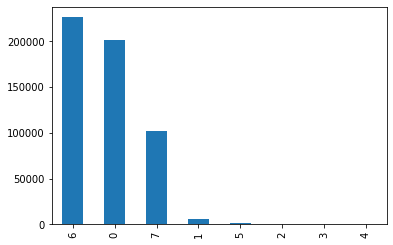

In [ ]:
#Grafico de barras de ACCOUNT STATUS
df_limpio["ACCOUNT STATUS"].value_counts().plot.bar()

#0: 1-29 días de atraso 
#1: 30-59 días de atraso 
#2: 60-89 días de atraso  
#3: 90-119 días de atraso 
#4: 120-149 días de atraso 
#5: Deudas atrasadas o incobrables,canceladas por más de 150 días
#6: pagado ese mes 
#7: No hay préstamo para el mes

#La categoria que predomina es la 6, es decir, pago ese mes. La segunda es la 0, es decir, 1-29 días de retraso

In [ ]:
df_limpio["ACCOUNT STATUS"].value_counts()

6    226185
0    200930
7    102167
1      6423
5      1087
2       542
3       181
4       152
Name: ACCOUNT STATUS, dtype: int64

In [ ]:
df_limpio["ANNUAL INCOME"].describe().round()

count    537667.0
mean          3.0
std           1.0
min           1.0
25%           2.0
50%           2.0
75%           3.0
max          12.0
Name: ANNUAL INCOME, dtype: float64

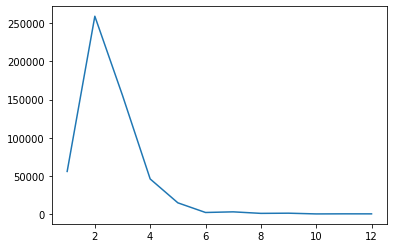

In [ ]:
#Grafico de ANNUAL INCOME
df_limpio["ANNUAL INCOME"].value_counts().sort_index().plot.line()
#Predominan los salarios entre $100K y $300K

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


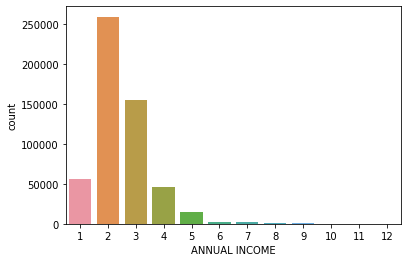

In [ ]:
#Expresado en gráfico de barrras
sns.countplot(df_limpio["ANNUAL INCOME"])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


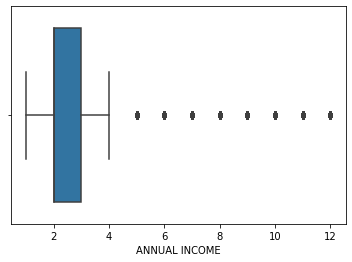

In [ ]:
#Expresado en boxplot
sns.boxplot(df_limpio["ANNUAL INCOME"], orient="V")

In [ ]:
df_limpio["ANNUAL INCOME"].value_counts()

2     259132
3     155343
1      55736
4      45880
5      14616
7       2787
6       1951
9       1025
8        788
11       185
12       150
10        74
Name: ANNUAL INCOME, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


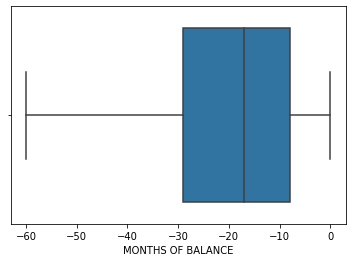

In [ ]:
#boxplot de mes de balance
sns.boxplot(df_limpio["MONTHS OF BALANCE"], orient="V")

In [ ]:
frec = df_limpio['EDUCATION LEVEL_Higher education'].value_counts()
frec

0    383897
1    153770
Name: EDUCATION LEVEL_Higher education, dtype: int64

In [ ]:
frec.sum()

531138

In [ ]:
frec_df = pd.DataFrame(frec)
frec_df

,EDUCATION LEVEL_Higher education
0,379289
1,151849


In [ ]:
frec_df.rename(columns={"EDUCATION LEVEL_Higher education":"FREC ABS"},inplace=True)
frec_df

,FREC ABS
0,379289
1,151849


In [ ]:
frec_abs_values = frec_df["FREC ABS"].values
acum = [] #esto es una lista vacia donde pondremos frec abs acumuladas
valor_acum = 0
for i in frec_abs_values:
  valor_acum = valor_acum + i
  acum.append(valor_acum)
frec_df["FREC ABS ACUM"] = acum
frec_df

,FREC ABS,FREC ABS ACUM
0,379289,379289
1,151849,531138


In [ ]:
frec_df["FREC RELATIVA"] = round(100 * frec_df["FREC ABS"] / len(df_limpio["EDUCATION LEVEL_Higher education"]), 4)
frec_df

,FREC ABS,FREC ABS ACUM,FREC RELATIVA
0,379289,379289,71.4106
1,151849,531138,28.5894


In [ ]:
frec_rel_values = frec_df["FREC RELATIVA"].values
acum = []
valor_acum = 0
for i in frec_rel_values:
  valor_acum = valor_acum + i
  acum.append(valor_acum)
frec_df["FREC RELATIVA ACUM"]=acum
frec_df

,FREC ABS,FREC ABS ACUM,FREC RELATIVA,FREC RELATIVA ACUM
0,379289,379289,71.4106,71.4106
1,151849,531138,28.5894,100.0000


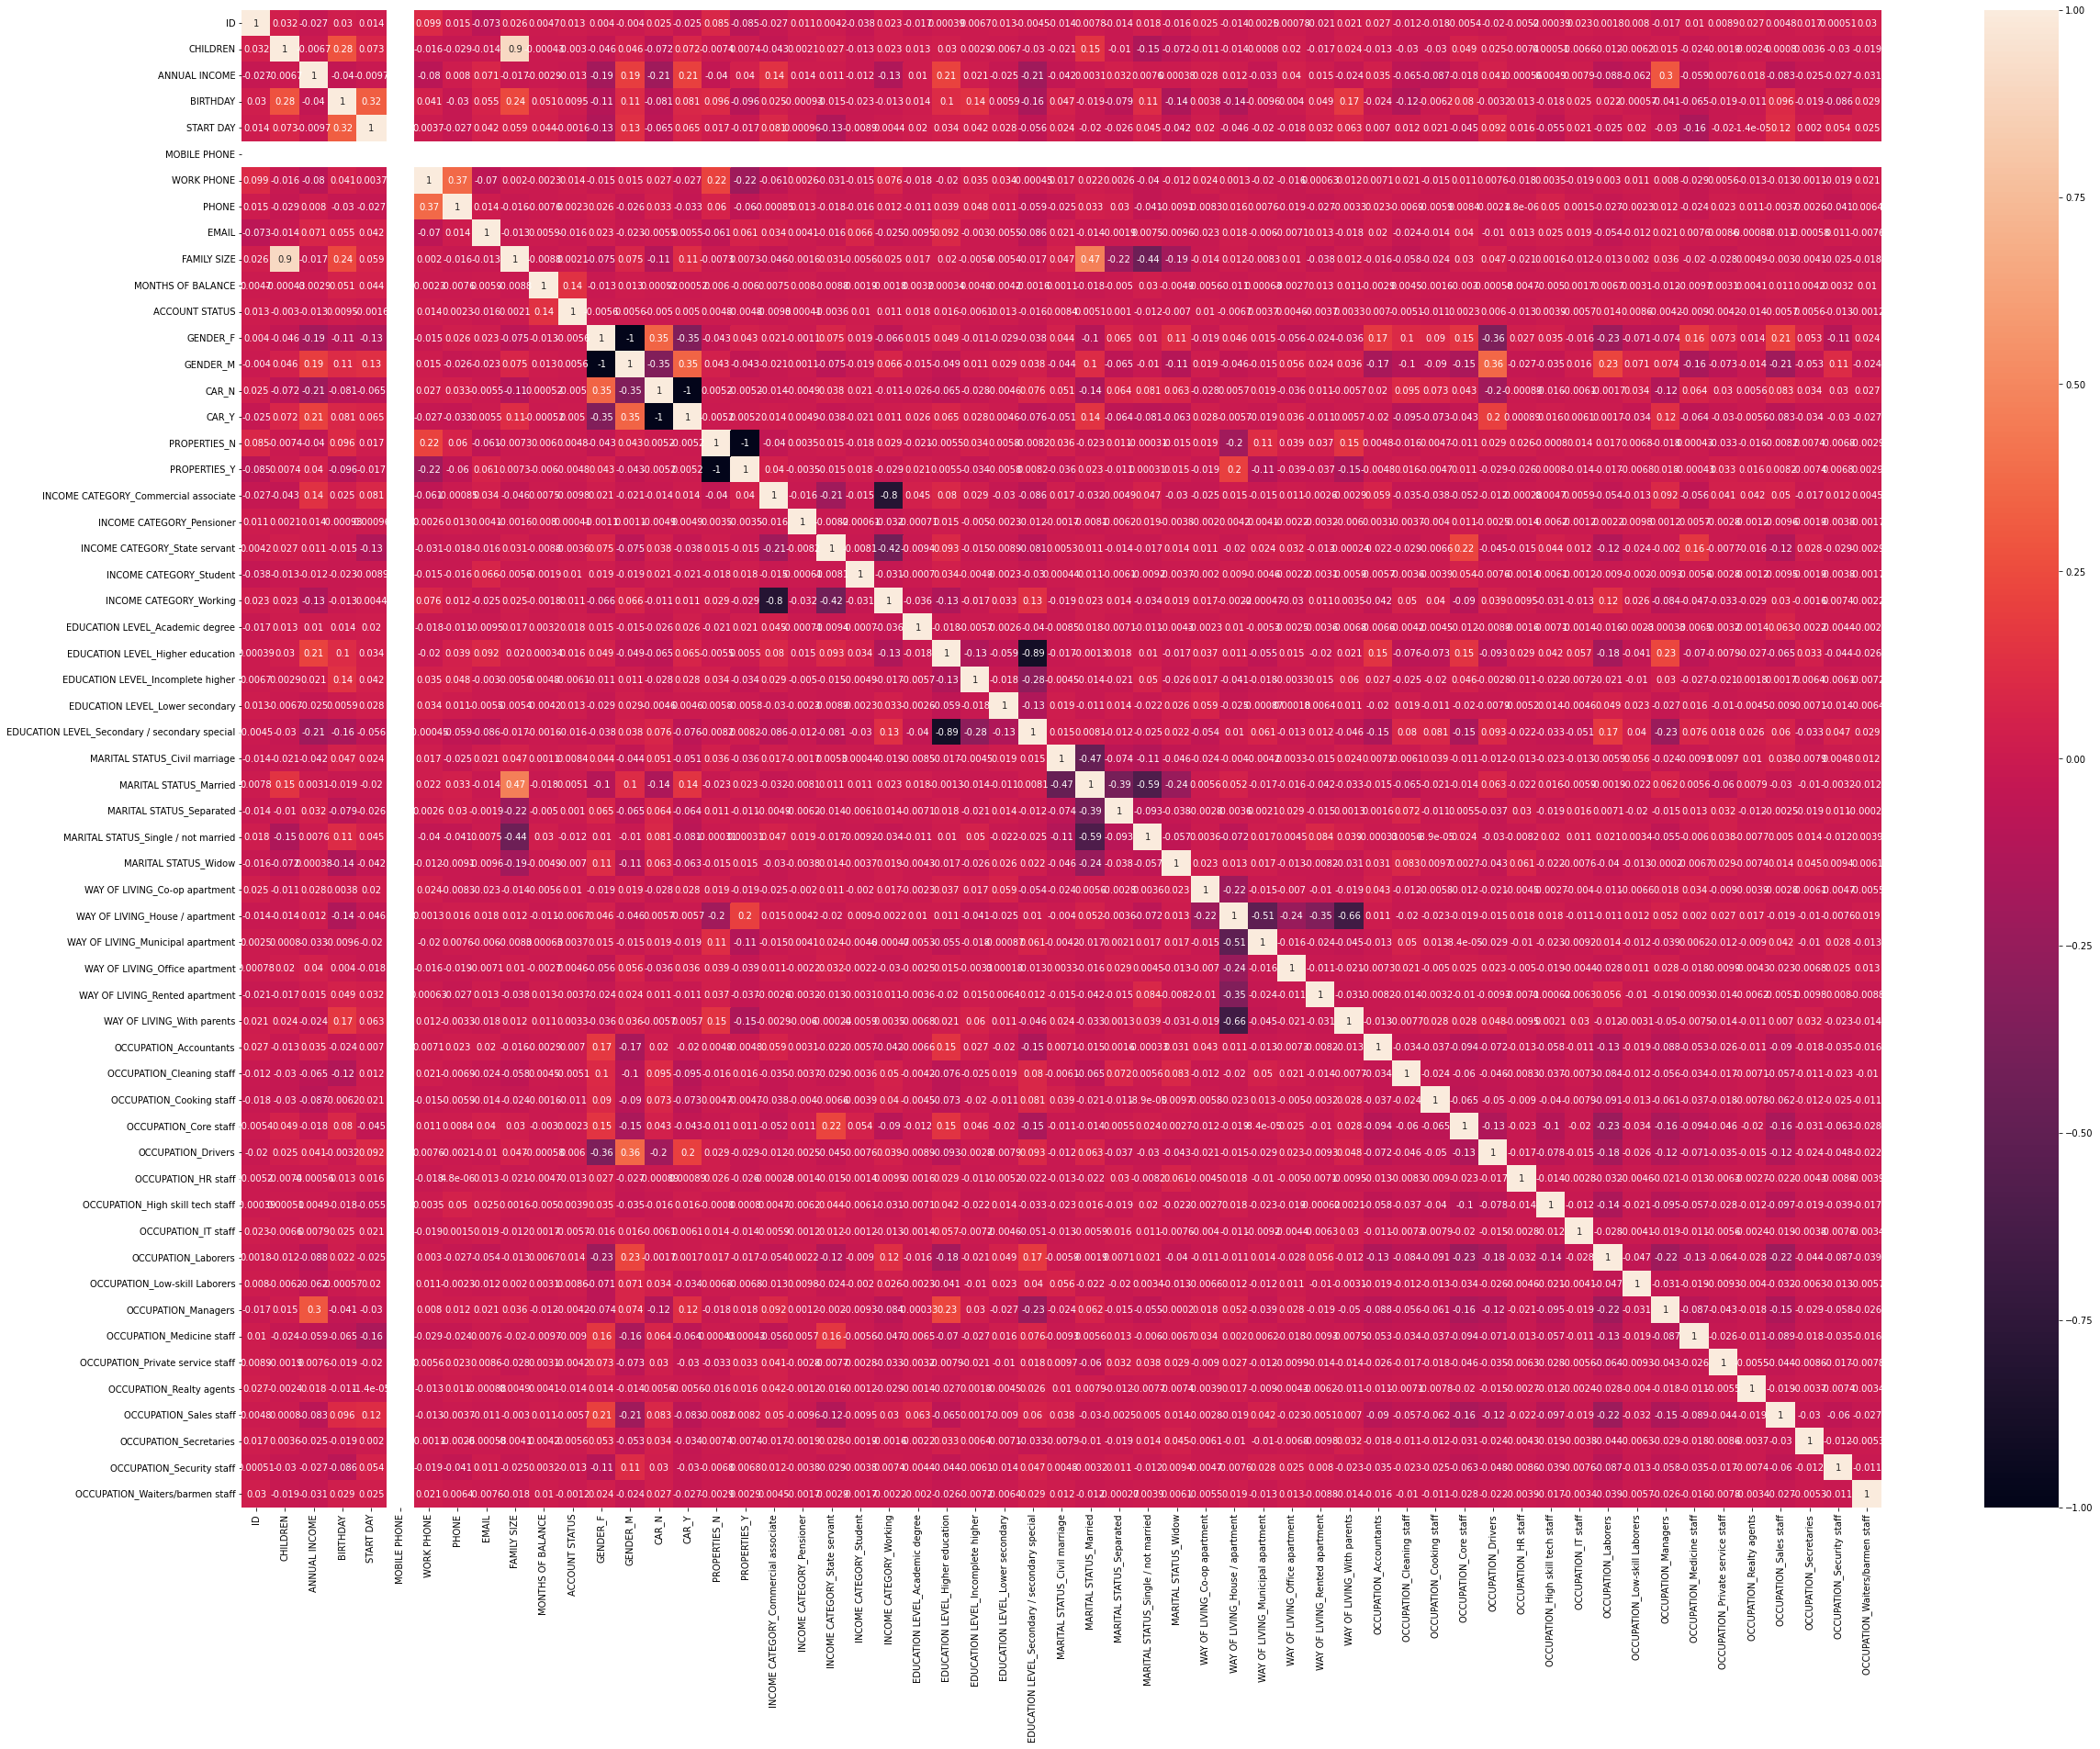

In [ ]:
plt.figure(figsize=(40, 30))

vg_corr = df_limpio.corr()
sns.heatmap(vg_corr, 
            xticklabels = vg_corr.columns.values,
            yticklabels = vg_corr.columns.values,
            annot = True);

In [ ]:
academic = df_limpio["EDUCATION LEVEL_Academic degree"].value_counts()
academic2= df_limpio["EDUCATION LEVEL_Higher education"].value_counts()
academic3 = df_limpio["EDUCATION LEVEL_Incomplete higher"].value_counts()
academic4 = df_limpio["EDUCATION LEVEL_Lower secondary"].value_counts()
academic5= df_limpio["EDUCATION LEVEL_Secondary / secondary special"].value_counts()
df_education = pd.DataFrame([academic,academic2,academic3,academic4,academic5])
df_education

,0,1
EDUCATION LEVEL_Academic degree,537233,434
EDUCATION LEVEL_Higher education,383897,153770
EDUCATION LEVEL_Incomplete higher,517077,20590
EDUCATION LEVEL_Lower secondary,533111,4556
EDUCATION LEVEL_Secondary / secondary special,179350,358317


In [ ]:
df_education.dtypes

0    int64
1    int64
dtype: object

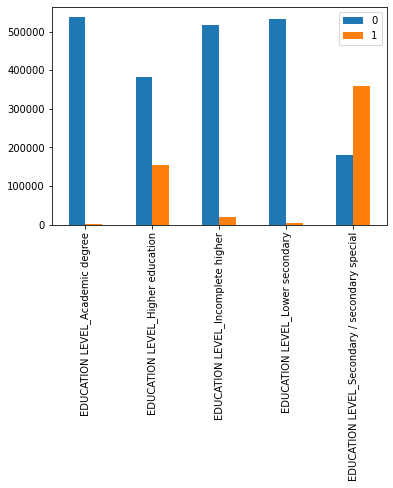

In [ ]:
df_education.plot.bar()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


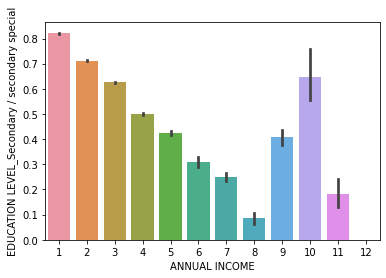

In [ ]:
#Relacionamos EDUCATION con ANNUAL INCOME
sns.barplot(df_limpio["ANNUAL INCOME"], df_limpio['EDUCATION LEVEL_Secondary / secondary special'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


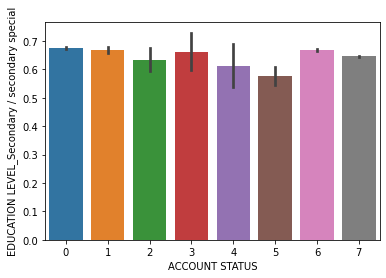

In [ ]:
#Relacionamos EDUCATION con ANNUAL INCOME
sns.barplot(df_limpio['ACCOUNT STATUS'], df_limpio['EDUCATION LEVEL_Secondary / secondary special'])

In [ ]:
pd.crosstab(df_limpio["ACCOUNT STATUS"], df_limpio["INCOME CATEGORY_Working"])

INCOME CATEGORY_Working,0,1
ACCOUNT STATUS,,
0,77843,123087
1,2562,3861
2,196,346
3,78,103
4,70,82
5,527,560
6,84671,141514
7,38852,63315


In [ ]:
pd.crosstab(df_limpio["ACCOUNT STATUS"], df_limpio["ANNUAL INCOME"])

ANNUAL INCOME,1,2,3,4,5,6,7,8,9,10,11,12
ACCOUNT STATUS,,,,,,,,,,,,
0,20984,95044,58916,17338,5632,796,1135,444,420,53,110,58
1,662,2902,2109,504,124,13,39,9,45,0,12,4
2,60,234,189,33,19,3,0,2,2,0,0,0
3,23,80,55,9,9,5,0,0,0,0,0,0
4,13,75,35,17,7,5,0,0,0,0,0,0
5,84,573,236,77,81,29,7,0,0,0,0,0
6,24652,111190,63540,18822,5643,580,1164,175,303,0,33,83
7,9258,49034,30263,9080,3101,520,442,158,255,21,30,5


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


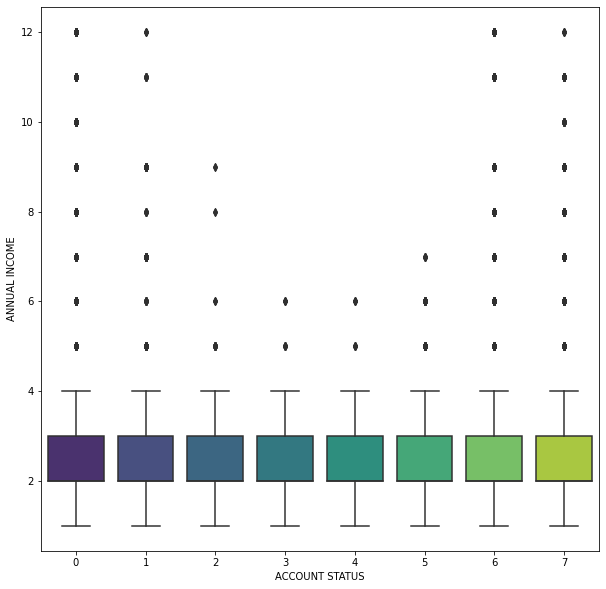

In [ ]:
plt.figure(figsize=(10,10))
plt.rcParams['figure.figsize'] = (12, 9)
sns.boxplot(df_limpio['ACCOUNT STATUS'], df_limpio['ANNUAL INCOME'], palette = 'viridis')
plt.show()

#MONTHS_BALANCE significa de que mes es el resumen de cuenta. 0 es el mes actual, -1 es el mes anterior, etc.
#STATUS significa si status de la cuenta y del pago.Significados:
  #0: 1-29 días de atraso 
  #1: 30-59 días de atraso 
  #2: 60-89 días de atraso  
  #3: 90-119 días de atraso 
  #4: 120-149 días de atraso 
  #5: Deudas atrasadas o incobrables,canceladas por más de 150 días
  #6: pagado ese mes 
  #7: No hay préstamo para el mes

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


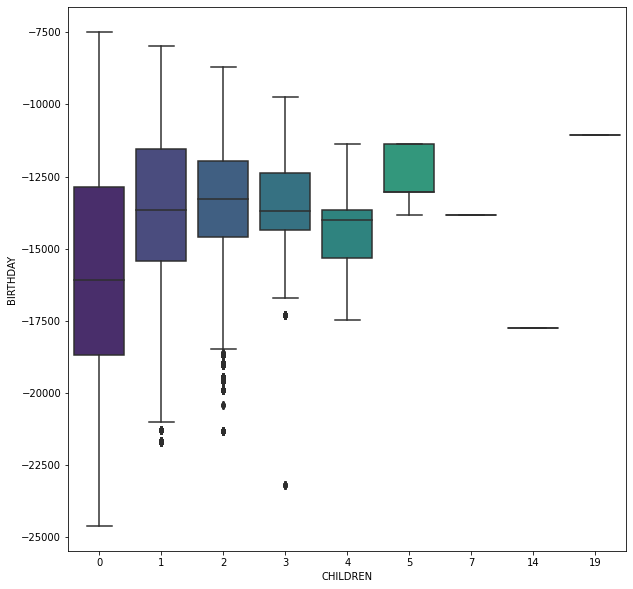

In [ ]:
plt.figure(figsize=(10,10))
plt.rcParams['figure.figsize'] = (12, 9)
sns.boxplot(df_limpio['CHILDREN'], df_limpio['BIRTHDAY'], palette = 'viridis')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<function matplotlib.pyplot.show>

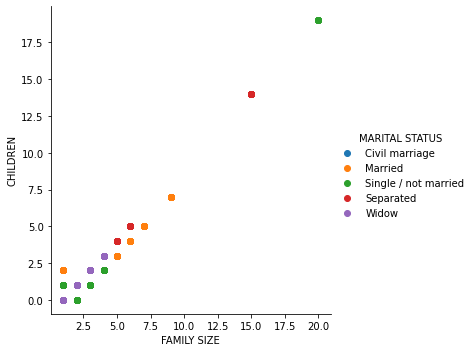

In [ ]:
sns.FacetGrid(df, hue="MARITAL STATUS", size= 5).map(plt.scatter,"FAMILY SIZE", "CHILDREN").add_legend();
plt.show

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<function matplotlib.pyplot.show>

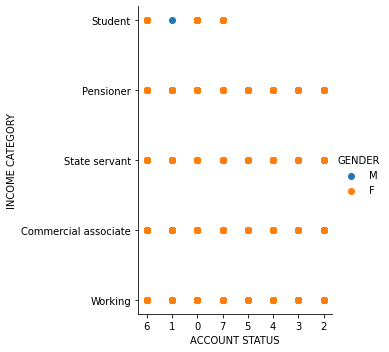

In [ ]:
sns.FacetGrid(df, hue="GENDER", size= 5).map(plt.scatter,"ACCOUNT STATUS", "INCOME CATEGORY").add_legend();
plt.show